In [1]:
import scipy.io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv1D, MaxPooling1D,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Conv1D, LSTM, Dense, BatchNormalization,
    Dropout, MaxPooling1D, Bidirectional,
    Input, Add, Flatten, GlobalMaxPooling1D,
    Multiply, Permute, Reshape, Activation,
    SpatialDropout1D
)
from tensorflow.keras.layers import Lambda
import tensorflow.keras.backend as K


In [2]:
def add_gaussian_noise(data, mean=0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, data.shape)
    noisy_data = data + noise
    return noisy_data

In [3]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [4]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [5]:
def apply_1d_fft(data):
    fft_result = np.fft.fft(data, axis=1)
    magnitude_spectrum = np.abs(fft_result)
    return magnitude_spectrum

In [6]:
def downsample(data):
  return data[:, ::2, :]

In [7]:
# Merge FFT-transformed data from all classes into a single dataset
fft_data = np.concatenate((normal, add_weight, PropellerDamage_slight, PropellerDamage_bad, PressureGain_constant))

# Create corresponding labels for each class
labels_normal = np.zeros(normal.shape[0])
labels_add = np.ones(add_weight.shape[0])
labels_slight = np.full(PropellerDamage_slight.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad.shape[0], 3)
labels_pressure = np.full(PressureGain_constant.shape[0], 4)

# Concatenate all label arrays into a single label vector
labels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

# Print the shapes of the final dataset and label array
print("shape of fft_data:", fft_data.shape)
print("shape of labels:", labels.shape)


shape of fft_data: (49302, 17)
shape of labels: (49302,)


In [8]:
testx = np.concatenate((normal_test, add_weight_test, PropellerDamage_slight_test, PropellerDamage_bad_test, PressureGain_constant_test))
labels_normal = np.zeros(normal_test.shape[0])
labels_add = np.ones(add_weight_test.shape[0])
labels_slight = np.full(PropellerDamage_slight_test.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad_test.shape[0], 3)
labels_pressure = np.full(PressureGain_constant_test.shape[0], 4)
ylabels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

In [9]:
# Split the data into training and validation sets with stratified sampling
X_train, X_val, y_train, y_val = train_test_split(fft_data, labels, test_size=0.2, stratify=labels, random_state=42)

# Apply Gaussian noise to training and validation sets
X_train = add_gaussian_noise(X_train)
X_val = add_gaussian_noise(X_val)

# Standardize the datasets using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(testx.reshape(-1, testx.shape[-1])).reshape(testx.shape)
y_test = ylabels

# Define a function to add Gaussian noise
def add_gaussian_noise(data, mean=0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, data.shape)
    return data + noise

# Add small Gaussian noise to training and validation sets after standardization
X_train = add_gaussian_noise(X_train, std_dev=0.03)
X_val = add_gaussian_noise(X_val, std_dev=0.03)

# Reshape the input data to fit LSTM input shape: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 17, 1))
X_val = X_val.reshape((X_val.shape[0], 17, 1))
X_test = X_test.reshape((X_test.shape[0], 17, 1))


# Print the shapes of the processed datasets
print("shape X_train", X_train.shape, "shape X_val", X_val.shape)
print("shape y_train", y_train.shape, "shape y_val", y_val.shape)


shape X_train (39441, 17, 1) shape X_val (9861, 17, 1)
shape y_train (39441,) shape y_val (9861,)


In [10]:
print(f"Shapes - Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Shapes - Train: (39441, 17, 1), Val: (9861, 17, 1), Test: (24693, 17, 1)


## Model Structure

In [11]:
# Define a residual block for deeper learning
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])  # Residual connection
    return x

# Input layer
input_layer = Input(shape=(17, 1))

# Initial convolutional block
x = Conv1D(64, 5, padding='same', activation='relu')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling1D(2)(x)
x = SpatialDropout1D(0.3)(x)

# Add residual blocks
for _ in range(2):
    x = residual_block(x, 64)




# Fully connected dense layers
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
x = Dense(64, activation='relu', kernel_regularizer='l2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer with softmax activation for multi-class classification
output_layer = Dense(5, activation='softmax')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)


In [12]:
# Define optimizer
optimizer = Adam(learning_rate=0.001)

# Early stopping to prevent overfitting; restores best weights after stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10)

# Compile the model with sparse categorical crossentropy and accuracy metric
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
# Train the model using the training generator
history = model.fit(
    X_train, y_train,             # Training data with augmentation
    epochs=100,                 # Maximum number of epochs
    validation_data=(X_val, y_val),  # Validation data with augmentation
    callbacks=[early_stop, reduce_lr],  # Callbacks for early stopping and learning rate adjustment
    verbose=1                    # Print progress during training
)


Epoch 1/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.5557 - loss: 3.1704 - val_accuracy: 0.8138 - val_loss: 0.8074 - learning_rate: 0.0010
Epoch 2/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7536 - loss: 0.8754 - val_accuracy: 0.8298 - val_loss: 0.5854 - learning_rate: 0.0010
Epoch 3/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7877 - loss: 0.7022 - val_accuracy: 0.8407 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 4/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8023 - loss: 0.6783 - val_accuracy: 0.8660 - val_loss: 0.5008 - learning_rate: 0.0010
Epoch 5/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8151 - loss: 0.6372 - val_accuracy: 0.8563 - val_loss: 0.5133 - learning_rate: 0.0010
Epoch 6/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8234 - loss: 0.6141 - val_accuracy: 0.8774 - val_loss: 0.4760 - learning_rate: 0.0010
Epoch 7/100
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - 

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9858 - loss: 0.1532
Test Accuracy: 0.9766


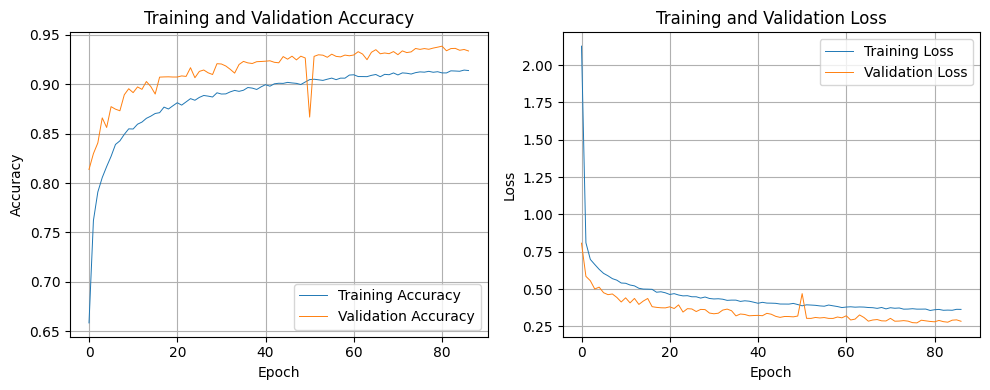

In [15]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, linewidth=0.7, label='Training Accuracy')
plt.plot(val_accuracy, linewidth=0.7, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, linewidth=0.7, label='Training Loss')
plt.plot(val_loss, linewidth=0.7, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


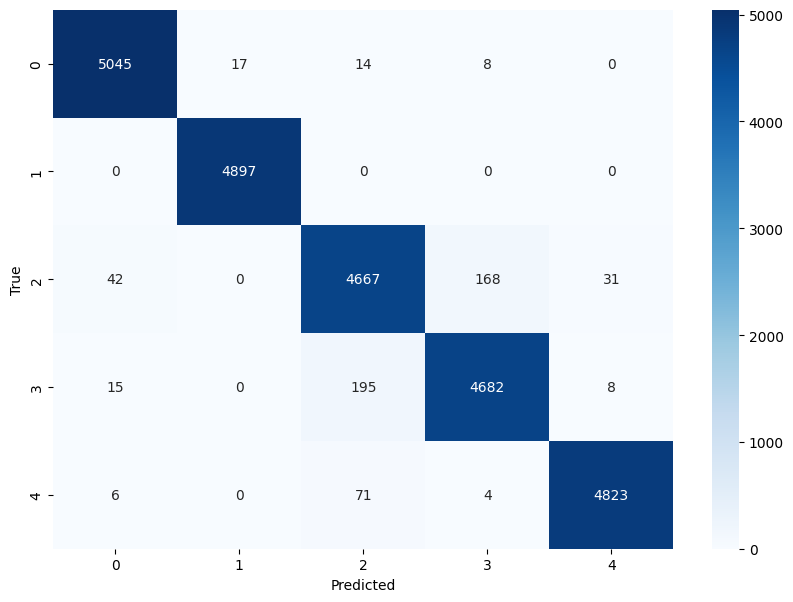

                        precision    recall  f1-score   support

                Normal       0.99      0.99      0.99      5084
             AddWeight       1.00      1.00      1.00      4897
PropellerDamage_slight       0.94      0.95      0.95      4908
   PropellerDamage_bad       0.96      0.96      0.96      4900
 PressureGain_constant       0.99      0.98      0.99      4904

              accuracy                           0.98     24693
             macro avg       0.98      0.98      0.98     24693
          weighted avg       0.98      0.98      0.98     24693



In [16]:

# Prediction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Report of classification
print(classification_report(y_test, y_pred_classes, target_names=[
    'Normal', 
    'AddWeight', 
    'PropellerDamage_slight', 
    'PropellerDamage_bad', 
    'PressureGain_constant'
]))